# Notebook to predict survival of passengers

First model: try Pclass & sex to predict (they have no missing values)
Then include embarkment: check how sklearn handles missing values

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import survival_funcs as fcs

In [2]:
from sklearn.naive_bayes import CategoricalNB 

In [3]:
#### User input ####
train_data = "../data/titanic/train.csv"

## the columns used for training
## (SibSp: number of siblings/spouses on board)
## (Parch: number of parents on board)
cols_read = ['PassengerId','Survived', 'Pclass', 'Sex', 'Age','Embarked',
             'SibSp', 'Parch', 'Fare', 'Cabin', 'Ticket']

## schema for the training dataset
train_schema = {'PassengerId': np.int16,
               'Survived': np.int16,
               'Pclass': np.int16,
               'Sex': str,
               'Age': np.float64,
               'Embarked': str}

## hash maps to convert enum values to numerals
sex_dict = {"female": 1,
           "male": 2}

emb_dict = {"S": 1,
           "Q": 2,
           "C": 3}

In [4]:
## read data into Dataframe
df_train = pd.read_csv(train_data, usecols = cols_read, dtype = train_schema)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int16  
 1   Survived     891 non-null    int16  
 2   Pclass       891 non-null    int16  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int16(3), int64(2), object(4)
memory usage: 61.0+ KB


In [5]:
## create numeral values for the enumerated classes
df_train = fcs.trans_cols(df_train, "Sex", "Sex_num", sex_dict)
df_train = fcs.trans_cols(df_train, "Embarked", "Embarked_num", emb_dict)

## inspect the training data
#df_train.head(10)

## Exploration of the categorical data

In [6]:
## survival rate by number of Pclass
fcs.get_group_probabilities(df_train, "Pclass")

,survival rate,people in group
Pclass,,
1,0.629630,216
2,0.472826,184
3,0.242363,491


In [7]:
## survival rate by number of Sex
fcs.get_group_probabilities(df_train, "Sex")

,survival rate,people in group
Sex,,
female,0.742038,314
male,0.188908,577


In [8]:
## survival rate by number of location of embarkment
fcs.get_group_probabilities(df_train, "Embarked")

,survival rate,people in group
Embarked,,
C,0.553571,168
Q,0.389610,77
S,0.336957,644


In [9]:
## survival rate by number of siblings 
fcs.get_group_probabilities(df_train, "SibSp")

,survival rate,people in group
SibSp,,
0,0.345395,608
1,0.535885,209
2,0.464286,28
3,0.250000,16
4,0.166667,18
5,0.000000,5
8,0.000000,7


In [10]:
## survival rate by number of parents/children on board 
fcs.get_group_probabilities(df_train, "Parch")

,survival rate,people in group
Parch,,
0,0.343658,678
1,0.550847,118
2,0.500000,80
3,0.600000,5
4,0.000000,4
5,0.200000,5
6,0.000000,1


### Conclusions
Both the sex and social class are important parameters to predict whether someone survives. 
Also embarkment seems to play a role survival rate.

## Exploration of the continuous data

## Naive Bayes categorical

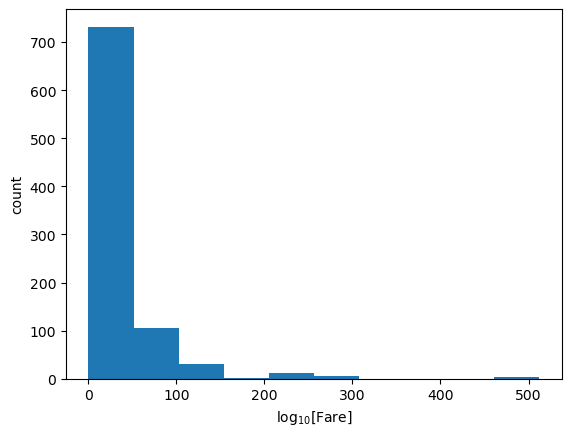

In [11]:
## distribution of the ticket prices
#plt.hist(np.log10(df_train["Fare"] + 0.01)) ## +0.01 to avoid zeros
plt.hist(df_train["Fare"])

plt.xlabel("log$_{10}$[Fare]")
plt.ylabel("count")
plt.show()

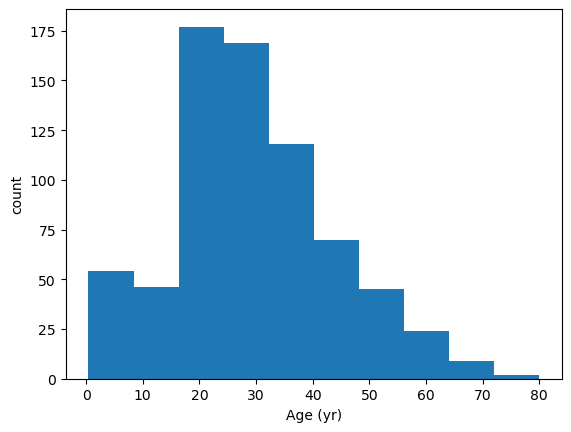

In [12]:
## distribution of the ages
plt.hist(df_train["Age"])

plt.xlabel("Age (yr)")
plt.ylabel("count")
plt.show()

In [13]:
## inspect survival probability as a function of age group
df_train["Decade"] = round(df_train["Age"]/10.)
fcs.get_group_probabilities(df_train, "Decade")

,survival rate,people in group
Decade,,
0.0,0.704545,44
1.0,0.411765,34
2.0,0.354260,223
3.0,0.404494,178
4.0,0.424242,132
5.0,0.409836,61
6.0,0.352941,34
7.0,0.000000,7
8.0,1.000000,1


In [14]:
## inspect survival probability as a function of age group
df_train["Price_group"] = round(df_train["Fare"]/10.)
fcs.get_group_probabilities(df_train, "Price_group")

,survival rate,people in group
Price_group,,
0.0,0.058824,17
1.0,0.256818,440
2.0,0.460000,100
3.0,0.437037,135
4.0,0.428571,28
5.0,0.433333,30
6.0,0.760000,25
7.0,0.263158,19
8.0,0.741935,31


## conclusions for normalization
Age, fare: either /10 or use log10 when working with a model

In [15]:
## remove nans for "Embarked_num" and "Decade"
df_train["Embarked_num"].fillna(0, inplace=True)
df_train["Decade"].fillna(0, inplace=True)

/var/folders/pb/xs3f5mtd5bq7lmrql1dj8p040000gn/T/ipykernel_3433/247947827.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train["Embarked_num"].fillna(0, inplace=True)


### Using categories with no missing values

In [16]:
## create categorical Bayes object
clf1 = CategoricalNB()

In [17]:
## create input data
X1 = fcs.get_features(df_train, ["Pclass", "Sex_num", "SibSp", "Parch"])
Y1 = np.array(df_train["Survived"])

## create model 1 and predict the results
model1 = clf1.fit(X1, Y1)
results1 = model1.predict(X1)

In [18]:
## print the accuracy
error_rate1 = np.sum(np.abs(Y1-results1))/len(results1)
print(1. - error_rate1)

0.7946127946127945


### Also including categories with missing values

In [19]:
## create categorical Bayes object
clf2 = CategoricalNB()

In [20]:
## create input data
X2 = fcs.get_features(df_train, ["Pclass", "Sex_num", "Embarked_num", "SibSp", "Parch"])

## create model 1 and predict the results
model2 = clf2.fit(X2, Y1)
results2 = model2.predict(X2)

In [21]:
## print the accuracy
error_rate2 = np.sum(np.abs(Y1-results2))/len(results2)
print(1. - error_rate2)

0.7946127946127945


## Include Fare and Age categories 

In [22]:
## create categorical Bayes object
clf3 = CategoricalNB()

## create input data
X3 = fcs.get_features(df_train, ["Pclass", "Sex_num", "Embarked_num", "SibSp", "Parch", "Price_group", "Decade"])

## create model 1 and predict the results
model3 = clf2.fit(X3, Y1)
results3 = model3.predict(X3)

In [23]:
## print the accuracy
error_rate3 = np.sum(np.abs(Y1-results3))/len(results3)
print(1. - error_rate3)

0.7755331088664422
